# 1) Setup

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np
import math
import scipy as sp
from scipy import stats

from copy import copy
import time
import yaml
import networkx as nx
import re

import sklearn
from sklearn.cluster import AgglomerativeClustering     #cluster edges
from sklearn.metrics import silhouette_score            #score for clustering
from sklearn.metrics import classification_report       #score for classification
from sklearn.model_selection import GridSearchCV        #cross validate for KDE
from sklearn.model_selection import cross_validate      #cross validate for classification
from sklearn.neighbors import KernelDensity             #KDE for visualisation

#classification algorithms
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

#visualise decision trees
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

#Pytorch libraries
import torch 
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms

import pymongo
from pymongo import MongoClient
from datetime import datetime
from datetime import timedelta
print("done")

done


In [319]:
#import functions from python files

#1) draw maps
from draw_graph import *
from draw_graph_tsc import *

#2) Bayesian optimisation of Lognormal model
from Gamma import *
from Lognormal import *
from Gaussian import *
from Gaussian_broadcast import *
from Normal_Gamma import *

from Normal_Gamma_bayes import *
from Normal_Gamma_bayes_update import *
from Gaussian_ml import *              # for comparison

from select_data import *
from select_data_edge import *

from kde import *

#3) Clustering
from get_context import *
from get_adjacent import *
from get_coords import *

from distances_length import *
from distances_length_subset import *
from distances_connections import *
from distances_connections2 import *
from distances_ks import *
from distances_square import *
from distances_angle_max import *
from distances_class import *

from underscore_prefix import *
from underscore_suffix import *

from integrate import *
from integrate_trapezium import *
from integrate_simpson import *
from integrate_pdf import *

from calc_length import *
from calc_angle import *

from optimum_clusters import *
from optimum_clusters_DBSCAN import *
from optimum_clusters_SC import *
from draw_clusters import *
from draw_clusters_tsc import *

from error_ks_2samples import *
from error_square_2samples import *
from compare_edges import *

#4) Classification
from get_length import *
from get_connections import *
from get_angle_max import *
from get_angle_sum import *

from dataloader6 import *
from dataloader_random import *
from classifier_pointtest import *
from classifier_featureimportance import *
from classifier_comparemethods import *
from classifier_trainonboth import *

#5) Evaluation
from get_lognorm_fit import *
from evaluate_maxedge import *
from evaluate_maxedge_fast import *
from evaluate_alledge import *

print("done")

done


In [3]:
#AAF
# retrieve data
df_aaf_y4 = pd.read_excel("data_aaf_y4.xlsx")
df_aaf_y4 = df_aaf_y4[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
# retrieve data
df_aaf_y3 = pd.read_excel("data_aaf_y3.xlsx")
df_aaf_y3 = df_aaf_y3[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
# retrieve data
df_aaf_y2 = pd.read_excel("data_aaf_y2.xlsx")
df_aaf_y2 = df_aaf_y2[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
#merge data
df_aaf_merge = pd.concat([df_aaf_y4, df_aaf_y3, df_aaf_y2])
df_aaf_merge = df_aaf_merge.sample(frac=1).reset_index(drop = True)

#TSC
# retrieve data
df_tsc_bob = pd.read_excel("data_tsc_bob.xlsx")
df_tsc_bob = df_tsc_bob[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
# retrieve data
df_tsc_betty = pd.read_excel("data_tsc_betty.xlsx")
df_tsc_betty = df_tsc_betty[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
# retrieve data
df_tsc_y3 = pd.read_excel("data_tsc_y3.xlsx")
df_tsc_y3 = df_tsc_y3[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
#merge data
df_tsc_merge = pd.concat([df_tsc_betty, df_tsc_bob, df_tsc_y3])
df_tsc_merge = df_tsc_merge.sample(frac=1).reset_index(drop = True)

#LABS
# retrieve data
df_labs = pd.read_excel("data_labs.xlsx")
df_labs = df_labs[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
#randomise data
df_labs_merge = df_labs.sample(frac=1).reset_index(drop = True)

#BLENHEIM
# retrieve data
df_blenheim_random = pd.read_excel("data_blenheim_random.xlsx")
df_blenheim_random = df_blenheim_random[["origin", "target", "edge_id", "operation_time"]]
# retrieve data
df_blenheim_targeted = pd.read_excel("data_blenheim_targeted.xlsx")
df_blenheim_targeted = df_blenheim_targeted[["origin", "target", "edge_id", "operation_time"]]
#merge data
df_blenheim_merge = pd.concat([df_blenheim_random,df_blenheim_targeted])
df_blenheim_merge = df_blenheim_merge.sample(frac=1).reset_index(drop = True)

#WALMART
# retrieve data
df_walmart_random = pd.read_excel("data_walmart_random.xlsx")
df_walmart_random = df_walmart_random[["origin", "target", "edge_id", "operation_time"]]
# retrieve data
df_walmart_targeted = pd.read_excel("data_walmart_targeted.xlsx")
df_walmart_targeted = df_walmart_targeted[["origin", "target", "edge_id", "operation_time"]]
#merge data
df_walmart_merge = pd.concat([df_walmart_random,df_walmart_targeted])
df_walmart_merge = df_walmart_merge.sample(frac=1).reset_index(drop = True)

print("done")

done


# 2) Calculate distance matrices

## 2a) TSC

In [4]:
ks_matrix_tsc, ks_edges_tsc = distances_ks(df_tsc_merge, metric = "difference", cutoff = 20)

0 edges: 0.04638218879699707 secs
10 edges: 6.236192226409912 secs
20 edges: 10.963319301605225 secs
30 edges: 15.520850419998169 secs
40 edges: 19.66174840927124 secs
50 edges: 23.5385103225708 secs
60 edges: 27.279534339904785 secs
70 edges: 30.98216962814331 secs
80 edges: 34.75465631484985 secs
90 edges: 38.35708045959473 secs
100 edges: 41.835988998413086 secs
110 edges: 45.26279020309448 secs
120 edges: 48.70742583274841 secs
130 edges: 52.096402168273926 secs
140 edges: 55.4549343585968 secs
150 edges: 58.755653381347656 secs
160 edges: 62.076353788375854 secs
170 edges: 65.36358189582825 secs
180 edges: 68.5915002822876 secs
190 edges: 71.74005341529846 secs
200 edges: 73.60619735717773 secs
210 edges: 73.61215543746948 secs
220 edges: 73.61813950538635 secs
230 edges: 73.62512063980103 secs
240 edges: 73.63110494613647 secs
Time taken: 73.63708877563477 secs


In [6]:
context_tsc = get_context("tsc_map.yaml",suppress_message = False)
length_matrix_tsc,length_edges_tsc = distances_length_subset(context_tsc,ks_edges_tsc)

Time taken (get_context): 0.5870003700256348 secs
Time taken (distances_length_subset):  1.5862839221954346 secs


## 2b) AAF

In [8]:
ks_matrix_aaf, ks_edges_aaf = distances_ks(df_aaf_merge, metric = "difference", cutoff = 20)

0 edges: 0.038404226303100586 secs
10 edges: 13.730870723724365 secs
20 edges: 25.31630849838257 secs
30 edges: 35.282437324523926 secs
40 edges: 43.477206230163574 secs
50 edges: 51.17194056510925 secs
60 edges: 58.208786487579346 secs
70 edges: 64.7774178981781 secs
80 edges: 71.5262041091919 secs
90 edges: 77.855712890625 secs
100 edges: 83.73348116874695 secs
110 edges: 89.34379935264587 secs
120 edges: 94.91006708145142 secs
130 edges: 100.35412955284119 secs
140 edges: 105.73228073120117 secs
150 edges: 111.09155011177063 secs
160 edges: 116.51333498954773 secs
170 edges: 122.01188230514526 secs
180 edges: 124.64657235145569 secs
190 edges: 124.65651345252991 secs
200 edges: 124.66548943519592 secs
Time taken: 124.6754629611969 secs


In [35]:
context_aaf = get_context("aaf_map.yaml",suppress_message = False)
length_matrix_aaf,length_edges_aaf = distances_length_subset(context_aaf,ks_edges_aaf)

Time taken (get_context): 0.5662944316864014 secs
Time taken (distances_length_subset):  1.2103774547576904 secs


# 3) Hierarchical Agglomerative Clustering
- tune n_clusters OR distance_threshold

In [ ]:
n_clusters, s_list = optimum_clusters(ks_matrix_aaf, max_clusters = 20, method = "ss", linkage = "average")

Optimum tuneable param: 0.3999999999999998
Max silhouette coeff: 0.17467530411766738


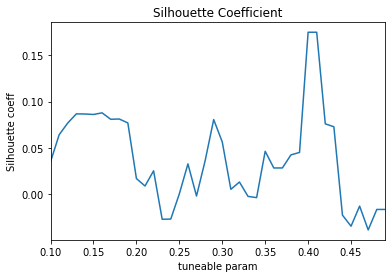

In [219]:
from sklearn.cluster import AffinityPropagation
distance_matrix = ks_matrix_aaf
method = "ss"
tune = np.arange(0.1,0.5,0.01)


s_list = []             #score list
for i in tune:
    clustering = AgglomerativeClustering(n_clusters=None, affinity='precomputed', 
                                     linkage = 'single', distance_threshold = i)

    labels = clustering.fit_predict( distance_matrix )
    if method == "ss":
        s = silhouette_score(distance_matrix , labels, metric='euclidean')
    elif method == "ch":
        s = calinski_harabasz_score(distance_matrix , labels)
    elif method == "db":
        s = davies_bouldin_score(distance_matrix , labels)
    else:
        raise ValueError("Method can be one of ['ss','ch','db']")
    s_list.append(s)

plt.plot(tune,s_list)
plt.xlabel("tuneable param")
plt.xlim([tune[0], tune[-1]]);
if method == "ss":
    plt.title("Silhouette Coefficient")
    plt.ylabel("Silhouette coeff")
    print("Optimum tuneable param:",tune[np.argmax(s_list)])
    print("Max silhouette coeff:", np.max(s_list))
elif method == "ch":
    plt.title("Calinski-Harabasz Index")
    plt.ylabel("CH Index")
    print("Optimum tuneable param:",tune[np.argmax(s_list)])
    print("Max CH index:", np.max(s_list))
elif method == "db":
    plt.title("Davies-Bouldin Index")
    plt.ylabel("DB Index")
    print("Optimum tuneable param:",tune[np.argmin(s_list)])
    print("Min DB index:", np.min(s_list))
else:
    raise ValueError("Method can be one of ['ss','ch','db']")     


In [226]:
clustering = AgglomerativeClustering(n_clusters=None, affinity='precomputed', 
                                     linkage = 'average', distance_threshold = 0.65)
labels = clustering.fit_predict( ks_matrix_aaf )
print(labels)
ks_clusters_aaf = pd.DataFrame(index = np.arange(len(ks_edges_aaf)),columns = ["edge_id", "cluster_id"])
ks_clusters_aaf["edge_id"] = ks_edges_aaf
ks_clusters_aaf["cluster_id"] = labels
print(np.max(labels) + 1, "clusters")

[ 2 14 14 14  2  2  0  2  2  2  6  6  3  2  3 15 14  2  2  2  6  0  2  2
 14  2  2  2  2  6  3  2  3  2  6  6  6  2  2  6  8 13  2  2  4  2  4  6
  6  2  0  2  0  2  3  6  6  4  6 12  2  2  2  2  2 12  2  6  4  9  2  5
  2  4  2  6  1  6  5  8  2  2  8  8  9  4  2  8 13  4 11  1  1 14  2  2
  4  2  0 13  3  3 14  2 14  1  2  0 14  3  3  3  2  3  2  2  6  0 13  3
 11  3 11  6  6  2  2  4  2  6  0 13  0  7  6  0  6  0 14 14  0  2 10  4
  2 13 14 14 14  2 14  8 14  0  4  6  2  2  6  6 14  2  2 13  2  7  2  2
  0  8  8  0  2  7  6]
16 clusters


no. of edges: 220
CLuster 0 has colour code: r
CLuster 1 has colour code: g
CLuster 2 has colour code: b
CLuster 3 has colour code: c
CLuster 4 has colour code: m
CLuster 5 has colour code: yellow
CLuster 6 has colour code: orange
CLuster 7 has colour code: purple
CLuster 8 has colour code: lime
CLuster 9 has colour code: cyan
CLuster 10 has colour code: darkgray
CLuster 11 has colour code: pink
CLuster 12 has colour code: brown
CLuster 13 has colour code: olive
CLuster 14 has colour code: gold
CLuster 15 has colour code: teal
Edges without enough data are black


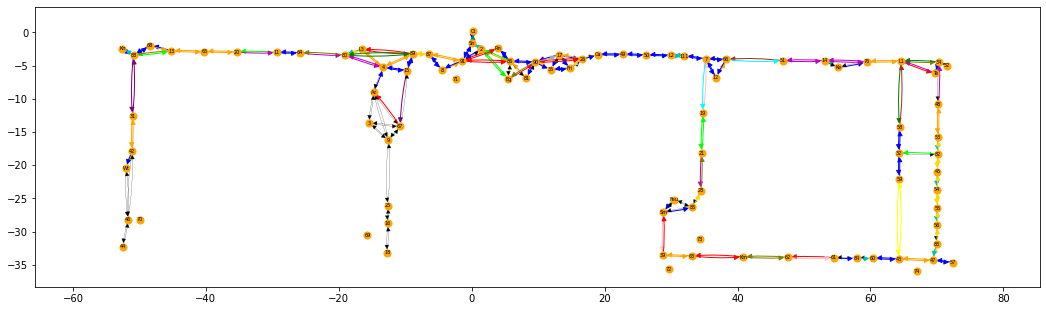

In [227]:
G = draw_clusters("aaf_map.yaml", ks_clusters_aaf, size = 3, rotate = True)
plt.savefig("TEST_HAC_distancethreshold.png", dpi = 1000, bbox_inches = "tight")

# 4) Affinity Propagation
- tune damping
- maybe also preference

Optimum no. of clusters: 0.5
Max silhouette coeff: 0.10737669966971075


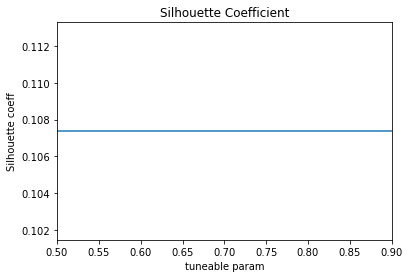

In [45]:
from sklearn.cluster import AffinityPropagation
distance_matrix = ks_matrix_aaf
method = "ss"
tune = np.arange(0.5,1,0.1)


s_list = []             #score list
for i in tune:
    clustering = AffinityPropagation(damping=i, max_iter=200, convergence_iter=15, 
                                     affinity='precomputed', preference=None, random_state = 0)

    labels = clustering.fit_predict( distance_matrix )
    if method == "ss":
        s = silhouette_score(distance_matrix , labels, metric='euclidean')
    elif method == "ch":
        s = calinski_harabasz_score(distance_matrix , labels)
    elif method == "db":
        s = davies_bouldin_score(distance_matrix , labels)
    else:
        raise ValueError("Method can be one of ['ss','ch','db']")
    s_list.append(s)

plt.plot(tune,s_list)
plt.xlabel("tuneable param")
plt.xlim([tune[0], tune[-1]]);
if method == "ss":
    plt.title("Silhouette Coefficient")
    plt.ylabel("Silhouette coeff")
    print("Optimum tuneable param:",tune[np.argmax(s_list)])
    print("Max silhouette coeff:", np.max(s_list))
elif method == "ch":
    plt.title("Calinski-Harabasz Index")
    plt.ylabel("CH Index")
    print("Optimum tuneable param:",tune[np.argmax(s_list)])
    print("Max CH index:", np.max(s_list))
elif method == "db":
    plt.title("Davies-Bouldin Index")
    plt.ylabel("DB Index")
    print("Optimum tuneable param:",tune[np.argmin(s_list)])
    print("Min DB index:", np.min(s_list))
else:
    raise ValueError("Method can be one of ['ss','ch','db']")     


In [47]:
from sklearn.cluster import AffinityPropagation
clustering = AffinityPropagation(damping=0.8, max_iter=200, 
                                 convergence_iter=15, affinity='precomputed', 
                                 preference=None, random_state = 0)
labels = clustering.fit_predict( ks_matrix_aaf )
print(labels)
ks_clusters_aaf = pd.DataFrame(index = np.arange(len(ks_edges_aaf)),columns = ["edge_id", "cluster_id"])
ks_clusters_aaf["edge_id"] = ks_edges_aaf
ks_clusters_aaf["cluster_id"] = labels
print(np.max(labels) + 1, "clusters")

[1 0 0 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0
 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 0 1
 0 1 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 0]
2 clusters


In [ ]:
G = draw_clusters("aaf_map.yaml", ks_clusters_aaf, size = 3, rotate = True)
plt.savefig("TEST_AffinityPropagation.png", dpi = 1000, bbox_inches = "tight")

# 5) DBSCAN
- tune eps & min_samples

## 5a) AAF

min_samples: 1
Optimum tuning param: 0.4
Max SS: 0.1747
min_samples: 2
Optimum tuning param: 0.4
Max SS: 0.1833


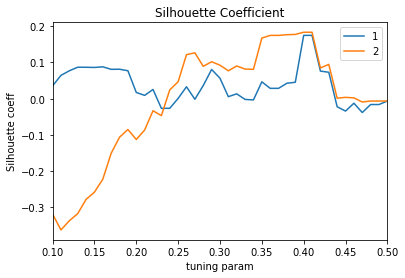

In [314]:
tune_dict,s_dict = optimum_clusters_DBSCAN(ks_matrix_aaf,method="ss",min_samples = 2)

In [317]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps = 0.4, min_samples = 1, metric='precomputed')
labels = clustering.fit_predict( ks_matrix_aaf )
print(labels)
ks_clusters_aaf = pd.DataFrame(index = np.arange(len(ks_edges_aaf)),columns = ["edge_id", "cluster_id"])
ks_clusters_aaf["edge_id"] = ks_edges_aaf
ks_clusters_aaf["cluster_id"] = labels
print(np.max(labels) + 1, "clusters")

[ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  2  0  0  0  0  0  1  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  3  0  0  3  0  3  0
  0  0  1  0  1  0  0  0  0  3  0  4  0  0  0  0  0  4  0  0  3  5  0  6
  0  3  0  0  7  0  8  3  0  0  3  3  5  3  0  3  3  3  9 10  7  0  0  0
  3  0  1  3  0  0  0  0  0  1  0 11  0  0  0  0  0  0  0  0  0 12  3  0
  9  0  9  0  0  0  0  3  0  0 11  3  1 13  0  1  0  1  0  0  1  0  0  3
  0  3  0  0  0  0  0  3  0  1  3  0  0  0  0  0  0  0  0  3  0 13  0  0
  1  3  3  1  0 14  0]
15 clusters


no. of edges: 220
CLuster 0 has colour code: r
CLuster 1 has colour code: g
CLuster 2 has colour code: b
CLuster 3 has colour code: c
CLuster 4 has colour code: m
CLuster 5 has colour code: yellow
CLuster 6 has colour code: orange
CLuster 7 has colour code: purple
CLuster 8 has colour code: lime
CLuster 9 has colour code: cyan
CLuster 10 has colour code: darkgray
CLuster 11 has colour code: pink
CLuster 12 has colour code: brown
CLuster 13 has colour code: olive
CLuster 14 has colour code: gold
Edges without enough data are black


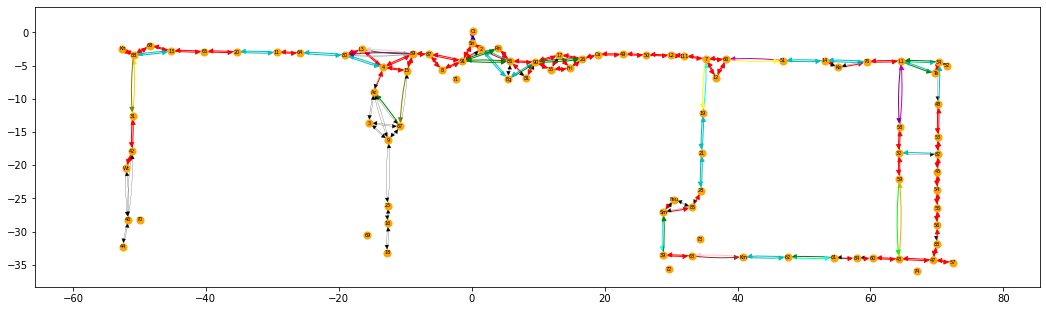

In [318]:
G = draw_clusters("aaf_map.yaml", ks_clusters_aaf, size = 3, rotate = True)
plt.savefig("TEST_DBSCAN.png", dpi = 1000, bbox_inches = "tight")

## 5b) TSC

Optimum tuning param: 0.4199999999999998
Max silhouette coeff: 0.11076987570049171


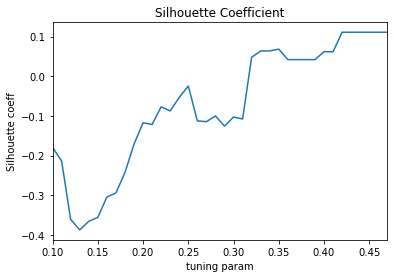

In [329]:
tune_dict,s_dict = optimum_clusters_DBSCAN(ks_matrix_tsc,method="ss",min_samples = 2)

In [334]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps = 0.25, min_samples = 2, metric='precomputed')
labels = clustering.fit_predict( ks_matrix_tsc )
print(labels)
ks_clusters_tsc = pd.DataFrame(index = np.arange(len(ks_edges_tsc)),columns = ["edge_id", "cluster_id"])
ks_clusters_tsc["edge_id"] = ks_edges_tsc
ks_clusters_tsc["cluster_id"] = labels
print(np.max(labels) + 1, "clusters")

[-1  0  1  1  1  1  1  2 -1  1  1 -1  0 -1  0  0  0  0  1 -1  1  1  3 -1
  1  1  1  1  1  1  1  4  5  6 -1  0  7  0  8 -1  8  9  1  1  1  1  0  1
 -1  1  9  1  1 -1 10 11  9 12 -1 11  8 -1  8 -1 -1  1  8  1  7 13  9  1
 13 10  1  7  8  1  0  0  0 10  1 -1 -1  0  6 -1  1 12 14 15 -1  1 -1  1
  9  1  1  1  1  1  1 16  1 -1 14  0  1  0  1 12 -1 12  8  1  1 -1 -1 -1
  2  1  1 -1  9  1  0  0  0  0  0 15  1  5 14  9 -1 12  0  0  1  1 15  0
  1  1  1  8  0  8  1  1  8  1 -1  1  1  0 -1 -1  0  0  1  1 -1  1  1  9
  9  0  1  8  1  8  0  0 -1  0  3 -1  0 -1  1  1  4  1  1 16  1 -1  9 15
  1  1  1  1]
17 clusters


no. of edges: 249
CLuster 0 has colour code: r
CLuster 1 has colour code: g
CLuster 2 has colour code: b
CLuster 3 has colour code: c
CLuster 4 has colour code: m
CLuster 5 has colour code: yellow
CLuster 6 has colour code: orange
CLuster 7 has colour code: purple
CLuster 8 has colour code: lime
CLuster 9 has colour code: cyan
CLuster 10 has colour code: darkgray
CLuster 11 has colour code: pink
CLuster 12 has colour code: brown
CLuster 13 has colour code: olive
CLuster 14 has colour code: gold
CLuster 15 has colour code: teal
CLuster 16 has colour code: maroon
Edges without enough data are black


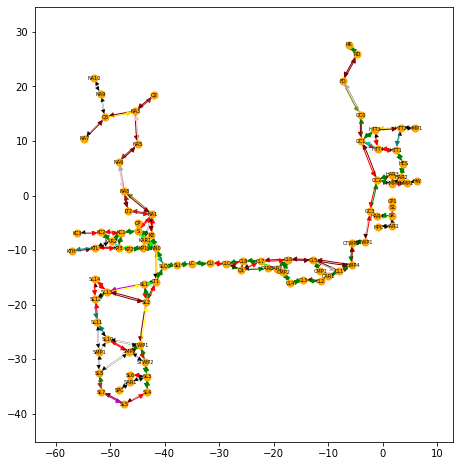

In [335]:
G = draw_clusters_tsc("tsc_map.yaml", ks_clusters_tsc, size = 2, rotate = False)
plt.savefig("TEST_DBSCAN_TSC.png", dpi = 1000, bbox_inches = "tight")

# 6) OPTICS (similar to DBSCAN)
- tune max_eps, min_samples
- metric = "precomputed"

## 6a) AAF

Optimum tuneable param: 10
Max CH index: 55.900155173809395


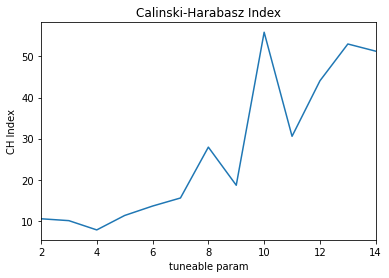

In [276]:
from sklearn.cluster import OPTICS
distance_matrix = ks_matrix_aaf
method = "ch"
tune = np.arange(2,15,1)


s_list = []             #score list
for i in tune:
    clustering = OPTICS(max_eps = 1, min_samples = i, metric='precomputed')

    labels = clustering.fit_predict( distance_matrix )
    if method == "ss":
        s = silhouette_score(distance_matrix , labels, metric='euclidean')
    elif method == "ch":
        s = calinski_harabasz_score(distance_matrix , labels)
    elif method == "db":
        s = davies_bouldin_score(distance_matrix , labels)
    else:
        raise ValueError("Method can be one of ['ss','ch','db']")
    s_list.append(s)

plt.plot(tune,s_list)
plt.xlabel("tuneable param")
plt.xlim([tune[0], tune[-1]]);
if method == "ss":
    plt.title("Silhouette Coefficient")
    plt.ylabel("Silhouette coeff")
    print("Optimum tuneable param:",tune[np.argmax(s_list)])
    print("Max silhouette coeff:", np.max(s_list))
elif method == "ch":
    plt.title("Calinski-Harabasz Index")
    plt.ylabel("CH Index")
    print("Optimum tuneable param:",tune[np.argmax(s_list)])
    print("Max CH index:", np.max(s_list))
elif method == "db":
    plt.title("Davies-Bouldin Index")
    plt.ylabel("DB Index")
    print("Optimum tuneable param:",tune[np.argmin(s_list)])
    print("Min DB index:", np.min(s_list))
else:
    raise ValueError("Method can be one of ['ss','ch','db']")     


In [275]:
from sklearn.cluster import OPTICS
clustering = OPTICS(max_eps = 1, min_samples = 8, metric='precomputed')
labels = clustering.fit_predict( ks_matrix_aaf )
print(labels)
ks_clusters_aaf = pd.DataFrame(index = np.arange(len(ks_edges_aaf)),columns = ["edge_id", "cluster_id"])
ks_clusters_aaf["edge_id"] = ks_edges_aaf
ks_clusters_aaf["cluster_id"] = labels
print(np.max(labels) + 1, "clusters")

[ 0  0  0  0  0  0  2  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  2  0  0
  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1 -1  0  0  1  0 -1  0
  0  0  2  0  2  0  0  0  0 -1  0 -1  0  0  0  0  0 -1  0  0  1 -1  0 -1
  0  1  0  0 -1  0 -1 -1  0  0 -1 -1 -1  1  0 -1 -1  1 -1 -1 -1  0  0  0
  1  0  2 -1  0  0  0  0  0  2  0 -1  0  0  0  0  0  0  0  0  0 -1 -1  0
 -1  0 -1  0  0  0  0  1  0  0 -1 -1  2 -1  0  2  0  2  0  0  2  0  0  1
  0 -1  0  0  0  0  0 -1  0  2  1  0  0  0  0  0  0  0  0 -1  0 -1  0  0
  2  0 -1  2  0 -1  0]
3 clusters


## 6b) TSC

Optimum tuneable param: 2
Max silhouette coeff: -0.0851587657903936


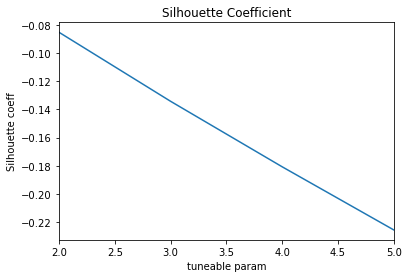

In [188]:
from sklearn.cluster import OPTICS
distance_matrix = ks_matrix_tsc
method = "ss"
tune = np.arange(2,6,1)


s_list = []             #score list
for i in tune:
    clustering = OPTICS(max_eps = 1, min_samples = i, metric='precomputed')

    labels = clustering.fit_predict( distance_matrix )
    if method == "ss":
        s = silhouette_score(distance_matrix , labels, metric='euclidean')
    elif method == "ch":
        s = calinski_harabasz_score(distance_matrix , labels)
    elif method == "db":
        s = davies_bouldin_score(distance_matrix , labels)
    else:
        raise ValueError("Method can be one of ['ss','ch','db']")
    s_list.append(s)

plt.plot(tune,s_list)
plt.xlabel("tuneable param")
plt.xlim([tune[0], tune[-1]]);
if method == "ss":
    plt.title("Silhouette Coefficient")
    plt.ylabel("Silhouette coeff")
    print("Optimum tuneable param:",tune[np.argmax(s_list)])
    print("Max silhouette coeff:", np.max(s_list))
elif method == "ch":
    plt.title("Calinski-Harabasz Index")
    plt.ylabel("CH Index")
    print("Optimum tuneable param:",tune[np.argmax(s_list)])
    print("Max CH index:", np.max(s_list))
elif method == "db":
    plt.title("Davies-Bouldin Index")
    plt.ylabel("DB Index")
    print("Optimum tuneable param:",tune[np.argmin(s_list)])
    print("Min DB index:", np.min(s_list))
else:
    raise ValueError("Method can be one of ['ss','ch','db']")     


In [190]:
from sklearn.cluster import OPTICS
clustering = OPTICS(max_eps = 1, min_samples = 6, metric='precomputed')
labels = clustering.fit_predict( ks_matrix_tsc )
print(labels)
ks_clusters_tsc = pd.DataFrame(index = np.arange(len(ks_edges_tsc)),columns = ["edge_id", "cluster_id"])
ks_clusters_tsc["edge_id"] = ks_edges_tsc
ks_clusters_tsc["cluster_id"] = labels
print(np.max(labels) + 1, "clusters")

[-1 -1  0 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1
  0 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]
2 clusters


# 7) Spectral Clustering
- tune n_clusters

## 7a) AAF

Optimum n_clusters: 6
Max silhouette coeff: 0.3368988448813535


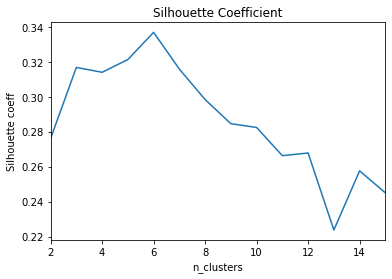

In [339]:
n_clusters, s_list = optimum_clusters_SC(ks_matrix_aaf, max_clusters = 15, method = "ss")

In [340]:
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(affinity='precomputed', n_clusters = 6)
labels = clustering.fit_predict( 1 - np.array(ks_matrix_aaf) )
print(labels)
ks_clusters_aaf = pd.DataFrame(index = np.arange(len(ks_edges_aaf)),columns = ["edge_id", "cluster_id"])
ks_clusters_aaf["edge_id"] = ks_edges_aaf
ks_clusters_aaf["cluster_id"] = labels
print(np.max(labels) + 1, "clusters")

[0 3 3 0 0 0 2 0 0 0 5 5 3 0 3 1 3 0 0 0 5 2 0 0 0 0 0 0 0 5 3 0 3 0 5 5 5
 0 0 5 5 4 0 0 4 0 4 5 5 0 2 0 2 0 3 5 5 4 5 1 0 0 0 0 0 1 0 5 4 1 0 1 0 4
 0 0 1 5 1 4 0 0 4 5 1 4 0 4 4 4 2 1 1 0 0 0 4 0 2 4 3 3 3 0 3 1 0 2 3 3 3
 3 0 3 0 0 5 2 4 3 2 3 2 5 5 0 0 4 0 5 2 4 2 1 5 2 5 2 3 3 2 0 0 4 0 4 3 3
 3 0 3 4 3 2 4 5 0 0 5 5 3 0 0 4 0 1 0 0 2 5 4 2 0 1 5]
6 clusters


no. of edges: 220
CLuster 0 has colour code: r
CLuster 1 has colour code: g
CLuster 2 has colour code: b
CLuster 3 has colour code: c
CLuster 4 has colour code: m
CLuster 5 has colour code: yellow
Edges without enough data are black


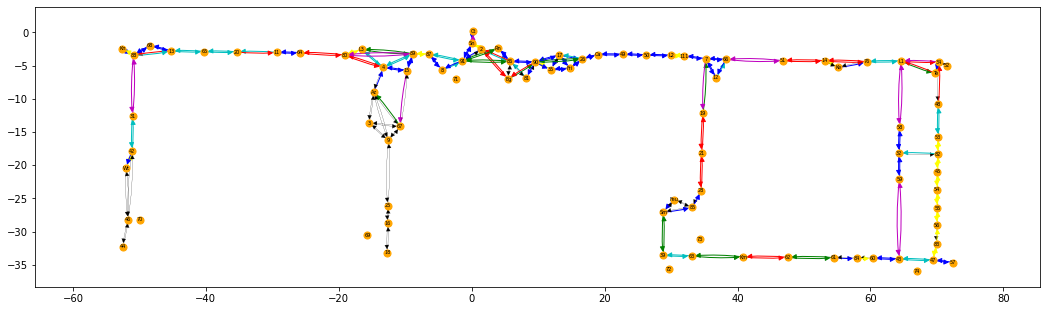

In [271]:
G = draw_clusters("aaf_map.yaml", ks_clusters_aaf, size = 3, rotate = True)
plt.savefig("TEST_SpectralClustering_AAF.png", dpi = 1000, bbox_inches = "tight")

## 7b) TSC

Optimum n_clusters: 4
Max silhouette coeff: 0.29023104395048266


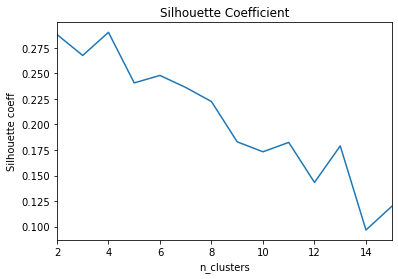

In [344]:
n_clusters, s_list = optimum_clusters_SC(ks_matrix_tsc, max_clusters = 15, method = "ss")

In [345]:
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(affinity='precomputed', n_clusters = 4)
labels = clustering.fit_predict( 1-np.array(ks_matrix_tsc) )
print(labels)
ks_clusters_tsc = pd.DataFrame(index = np.arange(len(ks_edges_tsc)),columns = ["edge_id", "cluster_id"])
ks_clusters_tsc["edge_id"] = ks_edges_tsc
ks_clusters_tsc["cluster_id"] = labels
print(np.max(labels) + 1, "clusters")

[2 1 0 0 0 0 0 2 1 0 0 0 1 2 1 1 1 1 0 1 0 0 0 1 0 0 3 0 0 0 0 2 2 3 2 1 3
 1 3 2 3 3 0 3 0 1 1 0 3 0 3 0 0 0 1 2 3 1 1 2 3 2 3 2 1 3 3 0 3 2 3 0 2 1
 0 3 3 0 1 1 1 1 0 1 0 1 3 2 0 1 2 1 2 0 2 0 3 0 0 0 0 0 0 2 0 1 2 1 0 1 0
 1 1 1 3 0 0 3 1 1 2 0 0 1 3 0 1 1 1 1 1 1 0 2 2 3 0 1 1 1 0 0 1 1 0 0 0 3
 1 3 0 0 3 0 0 0 3 1 0 3 1 1 0 0 0 0 0 3 3 1 0 3 0 3 1 1 1 1 0 1 1 2 0 0 2
 0 0 2 0 2 3 1 0 0 0 0]
4 clusters


no. of edges: 249
CLuster 0 has colour code: r
CLuster 1 has colour code: g
CLuster 2 has colour code: b
CLuster 3 has colour code: c
Edges without enough data are black


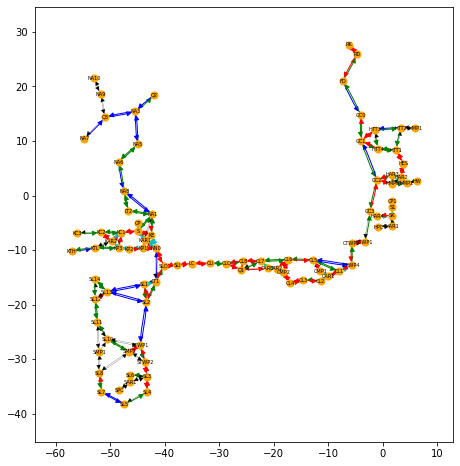

In [346]:
G = draw_clusters_tsc("tsc_map.yaml", ks_clusters_tsc, size = 2, rotate = False)
plt.savefig("TEST_SpectralClustering_TSC.png", dpi = 1000, bbox_inches = "tight")